# What sells a car?

 Hundreds of free advertisements for vehicles are published on your site 'Crankshaft List' every day. You need to study data collected over the last few years and determine which factors influence the price of a vehicle.

## Hypothesis
The more the age of the vehicle , price is reduced.

Mileage and condition of the vehicle should also be analyzed..
Parameters to be analyzed:
1.price
2.vehicles age
3.mileage
4.condition

## Initialization

In [1]:
# Loading all the libraries

import pandas as pd
import matplotlib.pyplot as plt 
import warnings

### Load data

In [2]:
warnings.filterwarnings("ignore")
# Load the data file into a DataFrame
df=pd.DataFrame()
try:
    df=pd.read_csv('/datasets/vehicles_us.csv')
except Exception as e:
        print ('Error in reading file')
        print (e)
df.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17


### Explore initial data

The dataset contains the following fields:
- `price`
- `model_year`
- `model`
- `condition`
- `cylinders`
- `fuel` — gas, diesel, etc.
- `odometer` — the vehicle's mileage when the ad was published
- `transmission`
- `paint_color`
- `is_4wd` — whether the vehicle has 4-wheel drive (Boolean type)
- `date_posted` — the date the ad was published
- `days_listed` — from publication to removal



In [3]:
# print the general/summary information about the DataFrame

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [4]:
# print a sample of data
df.head(10)


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17


We notice missing values in few columns with 'is_4wd' column having increased percentage of missing values
which requires proper analysis on how to deal with it.

'Price' of the dataset is float.Also ,'model_year' is described as float.
'cylinders' and 'odometer' column has float value for which int makes
more sense . 'is_4wd' is a float which when declared as 'int' can perform operations easily as boolean value can be expressed as '0' and'1'.So it is better to convert all float to int datatype.




Missing values are present in few columns with the most in 'is_4wd' column.
There are few missing values in 'odometer','paint_color','model_year' and 'cylinders'.
Other than 'is_4wd' ,other missing values are relatively lower percentage
'Is_4wd' being one of the main characteristcs to check on while buying car, we need to analyse carefully about the missing values.

### Conclusions and further steps



Observing the initial data shows some significant missing values in 'is_4wd'columns and some fewer missing values in other columns. There are some data type mismatch which needs to be fixed too.
Also 'price' column has some rows with 1 as value .This has to be changed as price cannot be 1.

## Treat missing values (if any)

In [5]:
#code to calculate % of missing values for each column
report = df.isna().sum().to_frame()#to_frame()-- series to dataframe with column headers as 0,1...
print(report)
report = report.rename(columns = {0: 'missing_values'})
report['% of total'] = (report['missing_values'] / df.shape[0]).round(2)
print(report.sort_values(by = 'missing_values', ascending = False))



                  0
price             0
model_year     3619
model             0
condition         0
cylinders      5260
fuel              0
odometer       7892
transmission      0
type              0
paint_color    9267
is_4wd        25953
date_posted       0
days_listed       0
              missing_values  % of total
is_4wd                 25953        0.50
paint_color             9267        0.18
odometer                7892        0.15
cylinders               5260        0.10
model_year              3619        0.07
price                      0        0.00
model                      0        0.00
condition                  0        0.00
fuel                       0        0.00
transmission               0        0.00
type                       0        0.00
date_posted                0        0.00
days_listed                0        0.00


Filling missing values in 'odometer' with median based on condition of the vehicle.

In [6]:
#grouped_by_condition = df.groupby('condition').agg({'odometer': 'median', 'price': 'median'})
#print(type(grouped_by_condition))
#print(grouped_by_condition)
#for row in df:
#    row['odometer']=grouped_by_condition[row['condition']]

df['odometer'] = df['odometer'].fillna(df.groupby('condition')['odometer'].transform('median'))
display(df.head(10))
display(df['odometer'].isna().sum(),':',df['price'].isna().sum())

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,181613.0,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17


0

':'

0

Filling missing values of 'model_year' and 'cylinders' with median obtained by grouping based on 'model' of the vehicle.

In [7]:
df['model_year'] = df['model_year'].fillna(df.groupby('model')['model_year'].transform('median'))
df['cylinders'] = df['cylinders'].fillna(df.groupby('model')['cylinders'].transform('median'))
display(df.head(10))


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,2011.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,181613.0,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,6.0,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17


'paint_color' has around 17% missing values.Though 'paint_color' is a factor in determining price of car , it is not a very crucial factor . So after proper analysis, missing rows can be removed if it is safe.

In [8]:
#replacing missing value with 'unknown'
print(df['paint_color'].value_counts())
df['paint_color'].fillna(value='unknown',inplace=True)
print(df['paint_color'].isna().sum())
print(df['paint_color'].value_counts())

white     10029
black      7692
silver     6244
grey       5037
blue       4475
red        4421
green      1396
brown      1223
custom     1153
yellow      255
orange      231
purple      102
Name: paint_color, dtype: int64
0
white      10029
unknown     9267
black       7692
silver      6244
grey        5037
blue        4475
red         4421
green       1396
brown       1223
custom      1153
yellow       255
orange       231
purple       102
Name: paint_color, dtype: int64


Observing 'is_4wd' ,we see nearly 50% of values are missing which is a really high percentage.So we have to work on this column to replace missing values by some way.

In [9]:
print(df['is_4wd'].value_counts())

1.0    25572
Name: is_4wd, dtype: int64


There is only 1 type of value.It looks like boolean True is represented as 1.0.
So wil replace missing values as 0.There is a possibility for leaving this field empty for a value of false.

In [10]:
#replace missing values with 0
df['is_4wd'].fillna(value=0,inplace=True)
print(df['is_4wd'].head(10))

0    1.0
1    1.0
2    0.0
3    0.0
4    0.0
5    1.0
6    0.0
7    1.0
8    1.0
9    1.0
Name: is_4wd, dtype: float64


Observing missing values,we dot see any significant patterns in any of the columns.
Will continue with next phase to see any missed patterns.

## Fix data types

In [11]:
#'model_year' to int as year cannot be float
df['model_year']=df['model_year'].astype('int')
print(df['model_year'].head(10))

0    2011
1    2011
2    2013
3    2003
4    2017
5    2014
6    2015
7    2013
8    2012
9    2008
Name: model_year, dtype: int64


In [12]:
#'cylinders' to int as number of cylinders cannot be float
df['cylinders']=df['cylinders'].astype('int')
print(df['cylinders'].head(10))

0    6
1    6
2    4
3    8
4    4
5    6
6    4
7    6
8    4
9    6
Name: cylinders, dtype: int64


In [13]:
#'odometer' to int for easy calculation using mileage
df['odometer']=df['odometer'].astype('int')


In [14]:
#'is_4wd' to bool for easy calculation for boolean..
df['is_4wd']=df['is_4wd'].astype('bool')
display(df['is_4wd'].head(10))

0     True
1     True
2    False
3    False
4    False
5     True
6    False
7     True
8     True
9     True
Name: is_4wd, dtype: bool

## Enrich data

In [15]:
# Add datetime values for when the ad was placed
#since 'date_posted' is string type ,we add a new column of datetime type to perform easy operations using date functions
print(type('date_posted'))#string
df['date_posted_datetime']=pd.to_datetime(df['date_posted'],format='%Y-%m-%d')
df.info()

<class 'str'>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   price                 51525 non-null  int64         
 1   model_year            51525 non-null  int64         
 2   model                 51525 non-null  object        
 3   condition             51525 non-null  object        
 4   cylinders             51525 non-null  int64         
 5   fuel                  51525 non-null  object        
 6   odometer              51525 non-null  int64         
 7   transmission          51525 non-null  object        
 8   type                  51525 non-null  object        
 9   paint_color           51525 non-null  object        
 10  is_4wd                51525 non-null  bool          
 11  date_posted           51525 non-null  object        
 12  days_listed           51525 non-null  int64         
 13  da

In [16]:
# Add the vehicle's age when the ad was placed
month=df['date_posted_datetime'].dt.month_name()
day=df['date_posted_datetime'].dt.day_name()

df['vehicle_age']=(df['date_posted_datetime'].dt.year-df['model_year'])+1
df['mileage_per_year'] = df['odometer']/df['vehicle_age']

display(df['mileage_per_year'].isna().sum())
display(df.head(10))
df['mileage_per_year']=df['mileage_per_year'].astype('int')
display(df['mileage_per_year'].value_counts())

0

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,date_posted_datetime,vehicle_age,mileage_per_year
0,9400,2011,bmw x5,good,6,gas,145000,automatic,SUV,unknown,True,2018-06-23,19,2018-06-23,8,18125.000000
1,25500,2011,ford f-150,good,6,gas,88705,automatic,pickup,white,True,2018-10-19,50,2018-10-19,8,11088.125000
2,5500,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,False,2019-02-07,79,2019-02-07,7,15714.285714
3,1500,2003,ford f-150,fair,8,gas,181613,automatic,pickup,unknown,False,2019-03-22,9,2019-03-22,17,10683.117647
4,14900,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,False,2019-04-02,28,2019-04-02,3,26967.666667
5,14990,2014,chrysler 300,excellent,6,gas,57954,automatic,sedan,black,True,2018-06-20,15,2018-06-20,5,11590.800000
6,12990,2015,toyota camry,excellent,4,gas,79212,automatic,sedan,white,False,2018-12-27,73,2018-12-27,4,19803.000000
7,15990,2013,honda pilot,excellent,6,gas,109473,automatic,SUV,black,True,2019-01-07,68,2019-01-07,7,15639.000000
8,11500,2012,kia sorento,excellent,4,gas,104174,automatic,SUV,unknown,True,2018-07-16,19,2018-07-16,7,14882.000000
9,9200,2008,honda pilot,excellent,6,gas,147191,automatic,SUV,blue,True,2019-02-15,17,2019-02-15,12,12265.916667


17371    359
13028    352
14890    341
20846    285
26057    280
        ... 
11637      1
15735      1
17784      1
12965      1
6093       1
Name: mileage_per_year, Length: 15570, dtype: int64

In [17]:
df['condition'] = df['condition'].map({'new':0,'like new': 1,'excellent':2,'good':3,'fair':4,'salvage':5})

## Check clean data

In [18]:
# print the general/summary information about the DataFrame

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   price                 51525 non-null  int64         
 1   model_year            51525 non-null  int64         
 2   model                 51525 non-null  object        
 3   condition             51525 non-null  int64         
 4   cylinders             51525 non-null  int64         
 5   fuel                  51525 non-null  object        
 6   odometer              51525 non-null  int64         
 7   transmission          51525 non-null  object        
 8   type                  51525 non-null  object        
 9   paint_color           51525 non-null  object        
 10  is_4wd                51525 non-null  bool          
 11  date_posted           51525 non-null  object        
 12  days_listed           51525 non-null  int64         
 13  date_posted_date

In [19]:
# print a sample of data
df.head(10)


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,date_posted_datetime,vehicle_age,mileage_per_year
0,9400,2011,bmw x5,3,6,gas,145000,automatic,SUV,unknown,True,2018-06-23,19,2018-06-23,8,18125
1,25500,2011,ford f-150,3,6,gas,88705,automatic,pickup,white,True,2018-10-19,50,2018-10-19,8,11088
2,5500,2013,hyundai sonata,1,4,gas,110000,automatic,sedan,red,False,2019-02-07,79,2019-02-07,7,15714
3,1500,2003,ford f-150,4,8,gas,181613,automatic,pickup,unknown,False,2019-03-22,9,2019-03-22,17,10683
4,14900,2017,chrysler 200,2,4,gas,80903,automatic,sedan,black,False,2019-04-02,28,2019-04-02,3,26967
5,14990,2014,chrysler 300,2,6,gas,57954,automatic,sedan,black,True,2018-06-20,15,2018-06-20,5,11590
6,12990,2015,toyota camry,2,4,gas,79212,automatic,sedan,white,False,2018-12-27,73,2018-12-27,4,19803
7,15990,2013,honda pilot,2,6,gas,109473,automatic,SUV,black,True,2019-01-07,68,2019-01-07,7,15639
8,11500,2012,kia sorento,2,4,gas,104174,automatic,SUV,unknown,True,2018-07-16,19,2018-07-16,7,14882
9,9200,2008,honda pilot,2,6,gas,147191,automatic,SUV,blue,True,2019-02-15,17,2019-02-15,12,12265


In [20]:
df.duplicated().sum()

0

Checking for duplicates ,shows that the dataset is free from duplicates.

## Study core parameters

The parameters are
- Price
- The vehicle's age when the ad was placed
- Mileage
- Number of cylinders
- Condition

1 : 375000


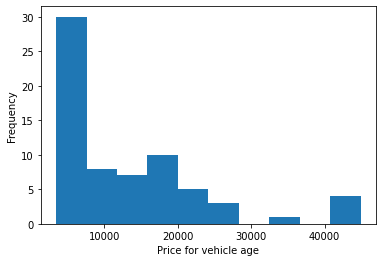

In [21]:
#Price vehicle_age
print(df['price'].min(),':',df['price'].max())
price_vehicle_age=df.pivot_table(index='vehicle_age' ,values='price',aggfunc='median')
plt.xlabel("Price for vehicle age")
plt.ylabel("Frequency")
plt.hist(price_vehicle_age['price'])
plt.show()

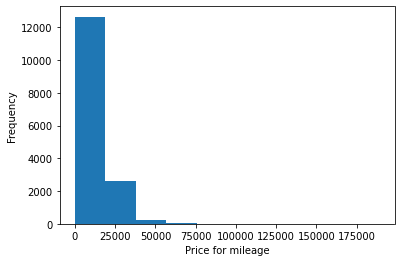

In [22]:
#mileage
price_mileage=df.pivot_table(index='mileage_per_year' ,values='price',aggfunc='median')
plt.xlabel("Price for mileage")
plt.ylabel("Frequency")
plt.hist(price_mileage['price'])
plt.show()


3 : 12


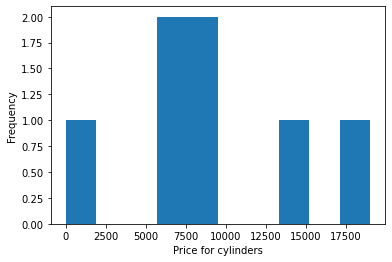

In [23]:
#Price no of cylinders
print(df['cylinders'].min(),':',df['cylinders'].max())
price_cylinders=df.pivot_table(index='cylinders' ,values='price',aggfunc='median')
plt.xlabel("Price for cylinders")
plt.ylabel("Frequency")
plt.hist(price_cylinders['price'])
plt.show()

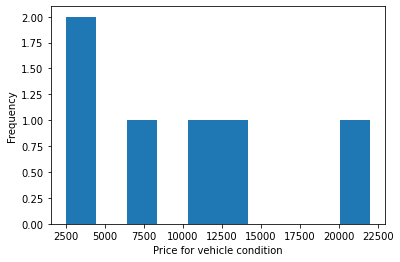

In [24]:
#Price condition
price_condition=df.pivot_table(index='condition' ,values='price',aggfunc='median')
plt.xlabel("Price for vehicle condition")
plt.ylabel("Frequency")
plt.hist(price_condition['price'])
plt.show()


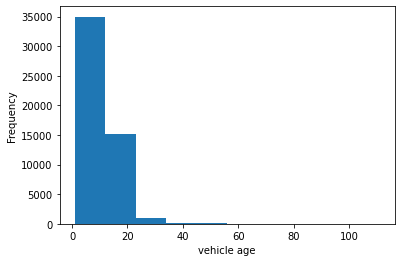

In [25]:
plt.xlabel("vehicle age")
plt.ylabel("Frequency")
plt.hist(df['vehicle_age'])
plt.show()


The above histogram shows that most of the vehicles age between 0-10yrs (35,000),fewer
ones in the range 10-20yrs(15,000) and very few more than 20yrs of age(very close to 0)..
This helps to conclude that vehicles of age 0-35yrs are the ones we need to consider..

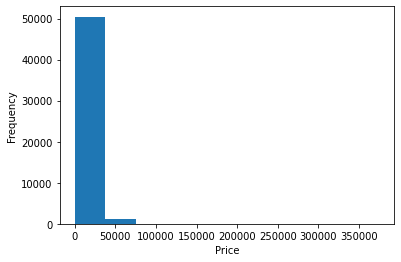

In [26]:
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.hist(df['price'])
plt.show()


The above histogram shows that most of the vehicles priced between 0-35000(around 50000)
and very few more than 35000..
This helps to conclude that vehicles priced between 0-35000 are the ones we need to consider..


The above histogram shows clearly price above 50000 is very rare..

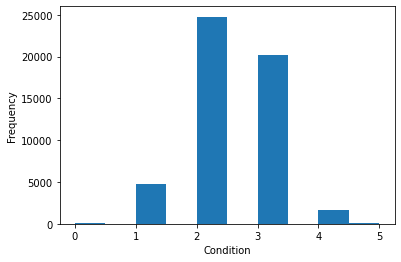

In [27]:
plt.xlabel("Condition")
plt.ylabel("Frequency")
plt.hist(df['condition'])
plt.show()

From the above histogram , we see that vehicles under condition 'new' and 'salvage' (5 and 0)is way too less..

vehicles with mileage around 75000 per year are the ones we need to work with.

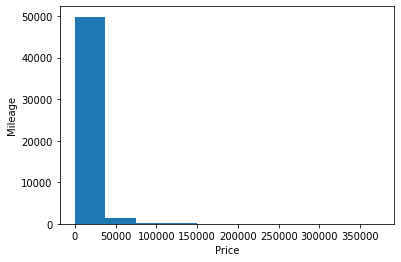

In [28]:
plt.xlabel("Price")
plt.ylabel("Mileage")
plt.hist(df['mileage_per_year'])
plt.show()

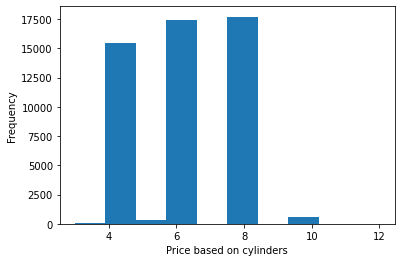

In [29]:
plt.xlabel("Price based on cylinders")
plt.ylabel("Frequency")
plt.hist(df['cylinders'])
plt.show()

vehicles with less than 4 cylinders are very few..So we will consider vehicles with 4-10 cylinders

## Study and treat outliers

Outliers are determined based on the histogram for each parameter and also the IQR and theoretical range for upper and lower limit.

In [30]:
#function to Determine the limits for outliers
def upper_lower_calc(item):
    outlier_list=[]
    Q1 = df[item].quantile(0.25)
    Q3 = df[item].quantile(0.75)
    IQR = Q3 - Q1
    print(IQR)
    lower_price=Q1 - (1.5*IQR)
    outlier_list.append(lower_price)
    upper_price= Q3 + (1.5*IQR)
    outlier_list.append(upper_price)
    return outlier_list

In [31]:
#Determine the lower and upper limits for outliers
price_outlier=upper_lower_calc('price')
print('price :', price_outlier)
vehicle_age_outlier=upper_lower_calc('vehicle_age')
print('vehicle_age :', vehicle_age_outlier)
condition_outlier=upper_lower_calc('condition')
print('condition :',condition_outlier)
mileage_per_year_outlier=upper_lower_calc('mileage_per_year')
print('mileage_per_year :', mileage_per_year_outlier)
cylinders_outlier=upper_lower_calc('cylinders')
print('cylinders:', cylinders_outlier)

11839.0
price : [-12758.5, 34597.5]
8.0
vehicle_age : [-7.0, 25.0]
1.0
condition : [0.5, 4.5]
8859.0
mileage_per_year : [-3925.5, 31510.5]
4.0
cylinders: [-2.0, 14.0]


In [32]:
# Store data without outliers in a separate DataFrame
updated_df=df.query('price < 35000 and vehicle_age < 24 and condition <5 and condition > 0 and cylinders >= 4 and cylinders < 12 and mileage_per_year < 40000       ')   
display(updated_df.head(10))


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,date_posted_datetime,vehicle_age,mileage_per_year
0,9400,2011,bmw x5,3,6,gas,145000,automatic,SUV,unknown,True,2018-06-23,19,2018-06-23,8,18125
1,25500,2011,ford f-150,3,6,gas,88705,automatic,pickup,white,True,2018-10-19,50,2018-10-19,8,11088
2,5500,2013,hyundai sonata,1,4,gas,110000,automatic,sedan,red,False,2019-02-07,79,2019-02-07,7,15714
3,1500,2003,ford f-150,4,8,gas,181613,automatic,pickup,unknown,False,2019-03-22,9,2019-03-22,17,10683
4,14900,2017,chrysler 200,2,4,gas,80903,automatic,sedan,black,False,2019-04-02,28,2019-04-02,3,26967
5,14990,2014,chrysler 300,2,6,gas,57954,automatic,sedan,black,True,2018-06-20,15,2018-06-20,5,11590
6,12990,2015,toyota camry,2,4,gas,79212,automatic,sedan,white,False,2018-12-27,73,2018-12-27,4,19803
7,15990,2013,honda pilot,2,6,gas,109473,automatic,SUV,black,True,2019-01-07,68,2019-01-07,7,15639
8,11500,2012,kia sorento,2,4,gas,104174,automatic,SUV,unknown,True,2018-07-16,19,2018-07-16,7,14882
9,9200,2008,honda pilot,2,6,gas,147191,automatic,SUV,blue,True,2019-02-15,17,2019-02-15,12,12265


## Study core parameters without outliers

Plotting each parameter using the new updated dataframe without outliers

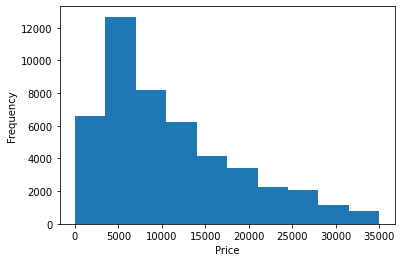

In [33]:
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.hist(updated_df['price'])
plt.show()

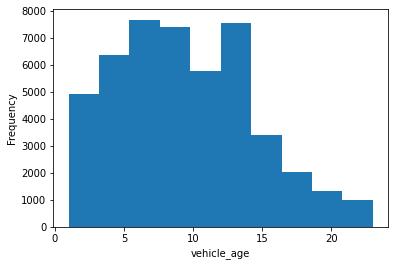

In [34]:

plt.xlabel("vehicle_age")
plt.ylabel("Frequency")
plt.hist(updated_df['vehicle_age'])
plt.show()

In [35]:
updated_vehicle_age_pivot=updated_df.pivot_table(index='vehicle_age' ,values='price',aggfunc='median')
display(updated_vehicle_age_pivot.head(10))

,price
vehicle_age,
1,21800
2,19500
3,18000
4,16999
5,14495
6,11998
7,9995
8,9999
9,8750


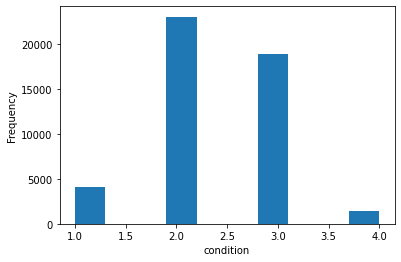

           price
condition       
1          12500
2           9995
3           7500
4           2500


In [36]:
plt.xlabel("condition")
plt.ylabel("Frequency")
plt.hist(updated_df['condition'])
plt.show()
updated_condition_pivot=updated_df.pivot_table(index='condition' ,values='price',aggfunc='median')
print(updated_condition_pivot)

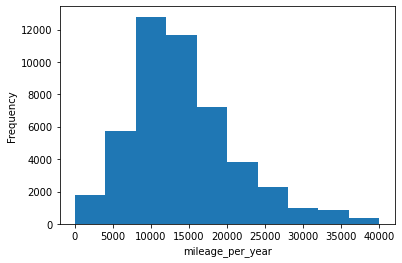

                    price
mileage_per_year         
0                  7900.0
1                  1995.0
2                 13000.0
3                  5900.0
4                  4574.5
...                   ...
39856             31988.0
39868             19999.0
39891              9850.0
39982             28990.0
39993             17950.0

[14340 rows x 1 columns]


In [37]:
plt.xlabel("mileage_per_year")
plt.ylabel("Frequency")
plt.hist(updated_df['mileage_per_year'])
plt.show()
updated_mileage_per_year_pivot=updated_df.pivot_table(index='mileage_per_year' ,values='price',aggfunc='median')
print(updated_mileage_per_year_pivot)

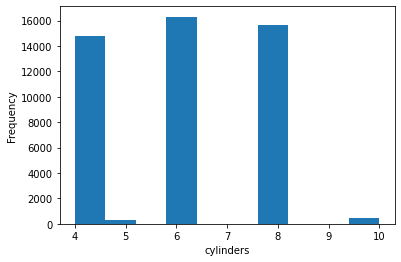

           price
cylinders       
4           6800
5           6500
6           8995
8          12999
10             1


In [38]:
plt.xlabel("cylinders")
plt.ylabel("Frequency")
plt.hist(updated_df['cylinders'])
plt.show()
updated_cylinders_pivot=updated_df.pivot_table(index='cylinders' ,values='price',aggfunc='median')
print(updated_cylinders_pivot)

In [39]:
#pivot table with the parameter discussed above and median price.
updated_pivot=updated_df.pivot_table(index=['vehicle_age','condition','mileage_per_year'],values='price',aggfunc='median')
print(updated_pivot)

                                          price
vehicle_age condition mileage_per_year         
1           1         10                  384.0
                      13                  371.0
                      14                  326.0
                      121               28000.0
                      677               23988.0
...                                         ...
23          4         13826              1000.0
                      14435              1500.0
                      15573               750.0
                      15652              3200.0
                      17391              3495.0

[26783 rows x 1 columns]


## Ads lifetime

Study how many days advertisements were displayed (`days_listed`). Calculate the mean and median. Describe the typical lifetime of an ad. Determine when ads were removed quickly, and when they were listed for an abnormally long time.

0 271
34.0
-32.0
104.0
Ads which were removed quickly within a day 


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,date_posted_datetime,vehicle_age,mileage_per_year
1247,14995,2008,chevrolet silverado 1500,2,8,gas,93300,automatic,truck,grey,True,2018-05-15,0,2018-05-15,11,8481
1711,59589,2019,chevrolet silverado 2500hd,2,8,diesel,104230,automatic,truck,white,True,2019-01-13,0,2019-01-13,1,104230
1983,14000,1999,ford f250,2,8,diesel,137500,automatic,truck,red,True,2018-09-27,0,2018-09-27,20,6875
2883,4000,2004,ram 1500,2,8,gas,250000,automatic,truck,brown,True,2018-08-13,0,2018-08-13,15,16666
3965,16750,1985,chevrolet corvette,1,8,gas,24540,automatic,hatchback,white,False,2018-10-14,0,2018-10-14,34,721
4567,5000,2007,toyota corolla,3,4,gas,223000,manual,sedan,silver,False,2018-07-11,0,2018-07-11,12,18583
4901,12500,2001,ram 1500,3,8,gas,99892,automatic,truck,black,True,2018-05-11,0,2018-05-11,18,5549
6114,500,2003,dodge dakota,4,6,gas,215457,automatic,pickup,unknown,False,2018-10-31,0,2018-10-31,16,13466
6548,4800,2007,honda odyssey,3,6,gas,152400,automatic,mini-van,brown,False,2018-09-25,0,2018-09-25,12,12700
7036,5900,2007,jeep grand cherokee laredo,2,6,gas,104230,automatic,SUV,grey,True,2018-07-21,0,2018-07-21,12,8685


Ads which were listed for an abnormally long time 


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,date_posted_datetime,vehicle_age,mileage_per_year
4360,5200,2011,chevrolet impala,1,6,gas,122000,automatic,sedan,unknown,False,2018-05-24,271,2018-05-24,8,15250


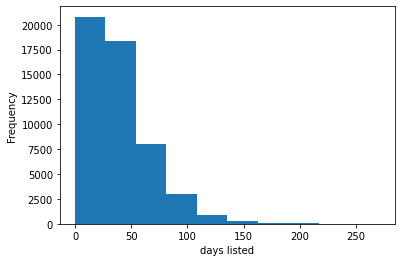

In [40]:
print(df['days_listed'].min(),df['days_listed'].max())

Q1 = df['days_listed'].quantile(0.25)
Q3 = df['days_listed'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)
lower_days_listed=Q1 - (1.5*IQR)
print(lower_days_listed)
upper_days_listed= Q3 + (1.5*IQR)
print(upper_days_listed)
#After verifying with theoretical value , We stick with min and max values 
print('Ads which were removed quickly within a day ')
display(df[df['days_listed']==df['days_listed'].min()].head(10))
print('Ads which were listed for an abnormally long time ')
display(df[df['days_listed']== df['days_listed'].max()])

plt.xlabel("days listed")
plt.ylabel("Frequency")
plt.hist(df['days_listed'])
plt.show()


The above graph shows that most of the ads were around 0-50 days..


In [41]:
print('Mean: ',df['days_listed'].mean())
print('Median :',df['days_listed'].median())

Mean:  39.55475982532751
Median : 33.0


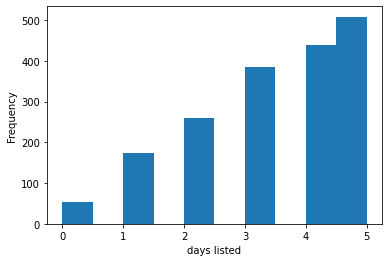

In [42]:

plt.xlabel("days listed")
plt.ylabel("Frequency")
plt.hist(df['days_listed'],range=(0,5))
plt.show()

Plotting with the range (0,5) for x axis, we see that around 50 of the data (ads) removed as quickly as within a day(0)

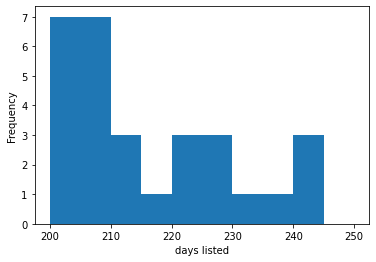

In [43]:
plt.xlabel("days listed")
plt.ylabel("Frequency")
plt.hist(df['days_listed'],range=(200,250))
plt.show()

The above histogram shows that few ads placed were there for more than 200 days ..

## Average price per each type of vehicle

Analyze the number of ads and the average price for each type of vehicle. Plot a graph showing the dependence of the number of ads on the vehicle type. Select the two types with the greatest number of ads.

In [44]:
price_per_type_pivot=updated_df.pivot_table(index='type' , values='price',aggfunc=('count','mean'))
print(price_per_type_pivot)

               count          mean
type                              
SUV          11703.0  10376.381184
bus             21.0  18107.428571
convertible    330.0  13153.475758
coupe         1929.0  13264.594609
hatchback      984.0   6678.311992
mini-van      1119.0   7762.027703
offroad        180.0  14433.983333
other          223.0  10394.408072
pickup        6214.0  14793.234310
sedan        11675.0   6835.982527
truck        11029.0  14981.654094
van            602.0  10235.438538
wagon         1510.0   8869.493377


In [45]:
price_per_type_pivot.reset_index(inplace=True)
display(price_per_type_pivot)
display(price_per_type_pivot['type'])

,type,count,mean
0,SUV,11703.0,10376.381184
1,bus,21.0,18107.428571
2,convertible,330.0,13153.475758
3,coupe,1929.0,13264.594609
4,hatchback,984.0,6678.311992
5,mini-van,1119.0,7762.027703
6,offroad,180.0,14433.983333
7,other,223.0,10394.408072
8,pickup,6214.0,14793.234310
9,sedan,11675.0,6835.982527


0             SUV
1             bus
2     convertible
3           coupe
4       hatchback
5        mini-van
6         offroad
7           other
8          pickup
9           sedan
10          truck
11            van
12          wagon
Name: type, dtype: object

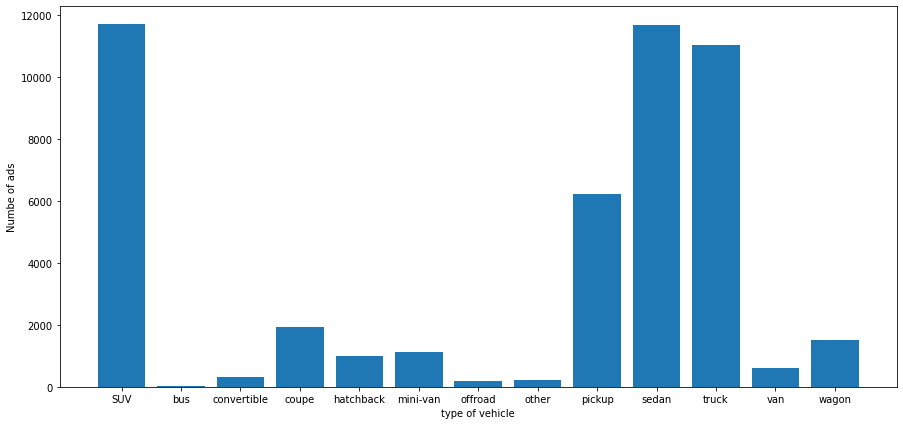

In [46]:
fig = plt.figure(figsize = (15, 7))
plt.xlabel("type of vehicle")
plt.ylabel("Numbe of ads")
plt.bar(price_per_type_pivot['type'],price_per_type_pivot['count'])
plt.show()


SUV and sedan are the vehicle types with greatest number of ads.

## Price factors

What factors impact the price most? Take each of the popular types you detected at the previous stage and study whether the price depends on age, mileage, condition, transmission type, and color. For categorical variables (transmission type and color), plot box-and-whisker charts, and create scatterplots for the rest. When analyzing categorical variables, note that the categories must have at least 50 ads; otherwise, their parameters won't be valid for analysis.


Creating seperate dataframe for the 2 most advertised vehicle type 'SUV' and 'sedan'.

In [47]:
SUV_df=updated_df[updated_df['type']=='SUV']
display(SUV_df.head(10))

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,date_posted_datetime,vehicle_age,mileage_per_year
0,9400,2011,bmw x5,3,6,gas,145000,automatic,SUV,unknown,True,2018-06-23,19,2018-06-23,8,18125
7,15990,2013,honda pilot,2,6,gas,109473,automatic,SUV,black,True,2019-01-07,68,2019-01-07,7,15639
8,11500,2012,kia sorento,2,4,gas,104174,automatic,SUV,unknown,True,2018-07-16,19,2018-07-16,7,14882
9,9200,2008,honda pilot,2,6,gas,147191,automatic,SUV,blue,True,2019-02-15,17,2019-02-15,12,12265
14,12990,2009,gmc yukon,2,8,gas,132285,automatic,SUV,black,True,2019-01-31,24,2019-01-31,11,12025
17,13990,2014,jeep cherokee,2,6,gas,100669,automatic,SUV,red,True,2018-08-16,25,2018-08-16,5,20133
18,12500,2013,chevrolet traverse,2,6,gas,128325,automatic,SUV,white,True,2019-04-09,13,2019-04-09,7,18332
20,6990,2009,chevrolet tahoe,2,8,gas,147485,automatic,SUV,silver,True,2018-08-05,28,2018-08-05,10,14748
21,5250,2007,toyota rav4,3,6,gas,154000,automatic,SUV,unknown,False,2018-08-22,8,2018-08-22,12,12833
23,7500,2004,jeep wrangler,3,6,gas,129000,automatic,SUV,red,True,2018-05-17,39,2018-05-17,15,8600


In [48]:
sedan_df=updated_df[updated_df['type']=='sedan']
display(sedan_df.head(10))

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,date_posted_datetime,vehicle_age,mileage_per_year
2,5500,2013,hyundai sonata,1,4,gas,110000,automatic,sedan,red,False,2019-02-07,79,2019-02-07,7,15714
4,14900,2017,chrysler 200,2,4,gas,80903,automatic,sedan,black,False,2019-04-02,28,2019-04-02,3,26967
5,14990,2014,chrysler 300,2,6,gas,57954,automatic,sedan,black,True,2018-06-20,15,2018-06-20,5,11590
6,12990,2015,toyota camry,2,4,gas,79212,automatic,sedan,white,False,2018-12-27,73,2018-12-27,4,19803
11,8990,2012,honda accord,2,4,gas,111142,automatic,sedan,grey,False,2019-03-28,29,2019-03-28,8,13892
13,16500,2018,hyundai sonata,2,4,gas,22104,automatic,sedan,silver,False,2019-01-14,29,2019-01-14,2,11052
19,13990,2018,hyundai elantra,2,4,gas,31932,automatic,sedan,red,False,2018-08-25,27,2018-08-25,1,31932
24,3950,2009,chrysler 200,2,4,gas,104230,automatic,sedan,red,False,2018-06-11,40,2018-06-11,10,10423
25,11499,2017,chevrolet malibu,1,4,gas,72982,automatic,sedan,unknown,False,2018-07-26,43,2018-07-26,2,36491
26,8499,2014,ford fusion se,1,4,gas,79523,automatic,sedan,red,False,2018-10-25,23,2018-10-25,5,15904


SUV - categorical and numeric data analysis 

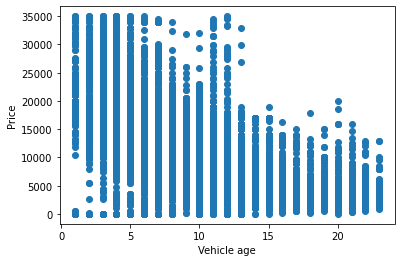

In [49]:
plt.xlabel("Vehicle age")
plt.ylabel("Price")
plt.scatter(SUV_df['vehicle_age'],SUV_df['price'])
plt.show()

we see that as the 'vehicle_age' increases , 'price' reduces..

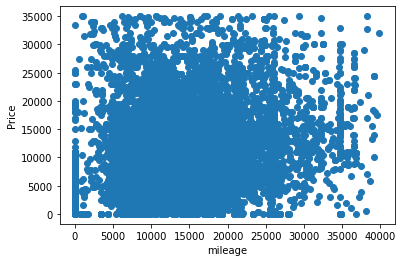

In [50]:
plt.xlabel("mileage")
plt.ylabel("Price")
plt.scatter(SUV_df['mileage_per_year'],SUV_df['price'])
plt.show()

As mileage increases ,price reduces though not very significantly..

In [51]:
price_for_condition_SUV=SUV_df.pivot_table(index='condition' ,values='price' ,aggfunc='median')
display(price_for_condition_SUV)
price_for_condition_SUV.reset_index(inplace=True)

,price
condition,
1,12995
2,9950
3,6995
4,2225


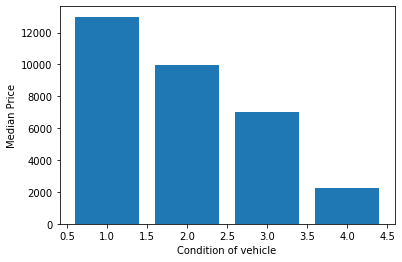

In [52]:
plt.xlabel("Condition of vehicle")
plt.ylabel("Median Price")
plt.bar(price_for_condition_SUV['condition'],price_for_condition_SUV['price'])
plt.show()

From the above plot , we see that with the better condition ,price increases.

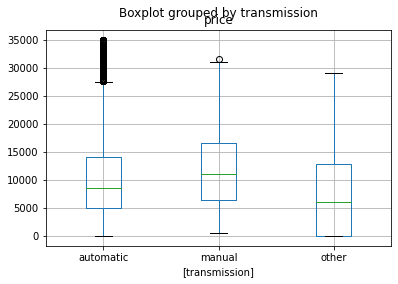

automatic    11095
manual         454
other          154
Name: transmission, dtype: int64


In [53]:
#transmission type

plot_data=SUV_df[['transmission','price']]
plot_data.boxplot(by='transmission')
plt.show()
#check if categories have atleast 50 ads.
print(SUV_df['transmission'].value_counts())


unknown    2103
black      2059
white      1833
silver     1510
grey       1117
blue        993
red         857
green       412
brown       362
custom      296
orange       78
yellow       44
purple       39
Name: paint_color, dtype: int64


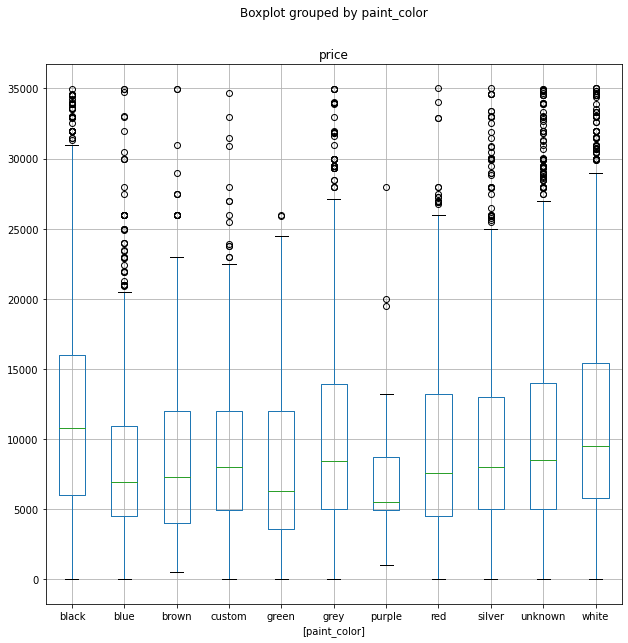

In [54]:
#check if categories have atleast 50 ads.
print(SUV_df['paint_color'].value_counts())

plot_data=SUV_df[['paint_color','price']]
#'yellow' and 'orange' paint_color has less than 50 ads.
plot_data=plot_data[(plot_data['paint_color']!='yellow')& (plot_data['paint_color']!='orange')]
plot_data.boxplot(by='paint_color' ,figsize=(10,10))

plt.show()





In [55]:
SUV_corr_df=SUV_df[['price','vehicle_age','mileage_per_year']]
display(SUV_corr_df.corr())

,price,vehicle_age,mileage_per_year
price,1.000000,-0.577141,0.207666
vehicle_age,-0.577141,1.000000,-0.527566
mileage_per_year,0.207666,-0.527566,1.000000


we see that price is negatively correated with age.The older the vehicle ,lesser the price.
We dont see much correlation with mileage.
With the condition of car being around 2-4,the price is more.
Suvs show slight increase in manual transmission with 'black' and 'white' paint colors having incresed price.

Sedan - numeric and categorical values analysis

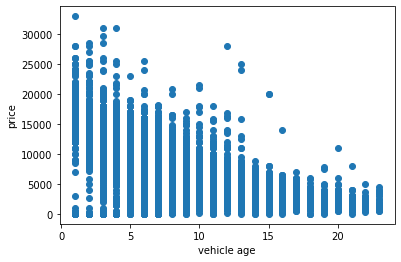

In [56]:
plt.xlabel("vehicle age")
plt.ylabel("price")
plt.scatter(sedan_df['vehicle_age'],sedan_df['price'])
plt.show()

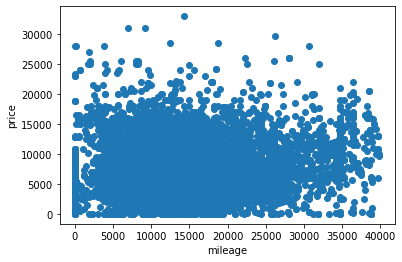

In [57]:
plt.xlabel("mileage")
plt.ylabel("price")
plt.scatter(sedan_df['mileage_per_year'],sedan_df['price'])
plt.show()

In [58]:
price_for_condition_sedan=sedan_df.pivot_table(index='condition' ,values='price' ,aggfunc='median')
display(price_for_condition_sedan)
price_for_condition_sedan.reset_index(inplace=True)

,price
condition,
1,7995
2,6800
3,4995
4,1500


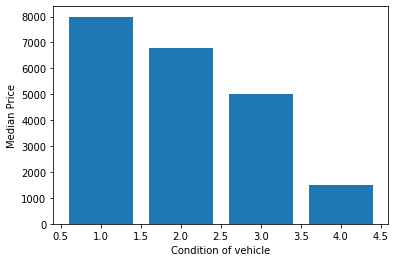

In [59]:
plt.xlabel("Condition of vehicle")
plt.ylabel("Median Price")
plt.bar(price_for_condition_sedan['condition'],price_for_condition_sedan['price'])
plt.show()

automatic    10982
manual         571
other          122
Name: transmission, dtype: int64


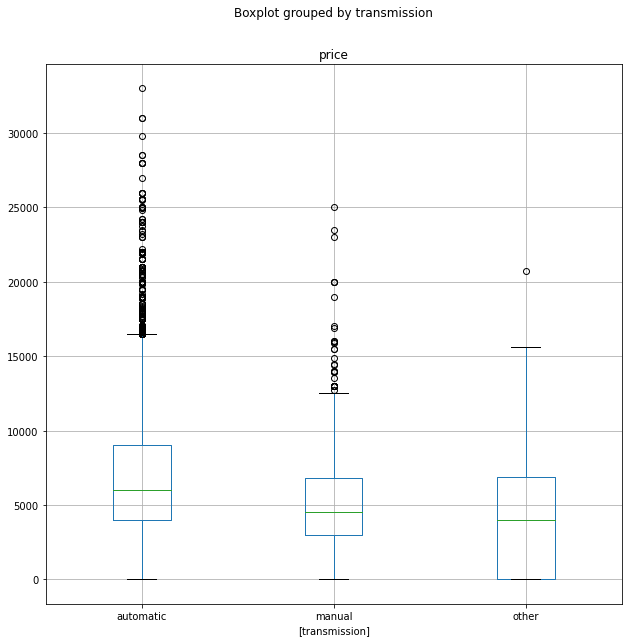

In [60]:
#transmission type

print(sedan_df['transmission'].value_counts())

plot_data=sedan_df[['transmission','price']]
plot_data.boxplot(by='transmission' ,figsize=(10,10))

plt.show()

unknown    2097
silver     1975
black      1703
grey       1573
white      1431
blue       1190
red         917
custom      278
brown       252
green       202
purple       26
yellow       22
orange        9
Name: paint_color, dtype: int64


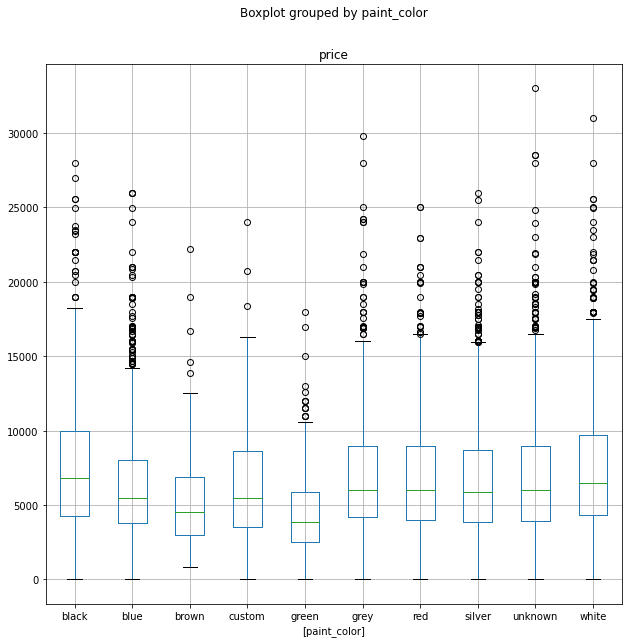

In [61]:
print(sedan_df['paint_color'].value_counts())

plot_data=sedan_df[['paint_color','price']]
plot_data=plot_data[(plot_data['paint_color']!='yellow')& (plot_data['paint_color']!='orange')& (plot_data['paint_color']!='purple')]
plot_data.boxplot(by='paint_color' ,figsize=(10,10))
plt.show()

In [62]:
sedan_corr_df=sedan_df[['price','vehicle_age','mileage_per_year']]
display(sedan_corr_df.corr())

,price,vehicle_age,mileage_per_year
price,1.000000,-0.618526,0.164926
vehicle_age,-0.618526,1.000000,-0.482075
mileage_per_year,0.164926,-0.482075,1.000000


We see that 'price' reduces with increse in 'vehicle_age'

Observing the data in sedan dataset , we see similarity with that of SUV.
The 'automatic' transmission increases the price of vehicle in this case.
vehicle age reduces the price.
mileage does not show a significant correlation with price.


## General conclusion


When viewed initially using info() , we see some missing values in few columns like  'odometer','paint_color','model_year' and 'cylinders' and 'is_4wd'.

'is_4wd' could have missing values as they were boolean false (not 4wd).So we safely assume 
their missing values as 0.

Some data types were 'float' which were then converted  to more appropriate 'int' type'odometer','paint_color','model_year' and 'cylinders'

Tesing for duplicates revealed that the dataset is free of duplicates.

We came across some rows with just 1 as price which is totally wrong.We replaced all 1s with  the least value that appears frequently and which doesnot impact the dataset.

To work on outliers , we used histogram to visualize each core parameter and also used IQR to
calculate upper and lower limits.
By comparing these two results , we came up with outlier range.

We visualized the same data set after removing outliers.

Analyzing the number of ads and the average price for each type of vehicle we plot a graph showing the dependence of the number of ads on the vehicle type. We found that the 'SUV' and 'truck' are the two types with the greatest number of ads.


Plotting the important parameters like 'price','vehicle_age','mileage_per_year' shows negative correlation between 'vehicle_age' and 'price' proving our hypothesis.
Also we see that 'mileage_per_year' and 'condition' also affects the 'price'. 


























